In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [3]:
# substitute missing values with NaN
data.replace(' ', pd.NA, inplace=True)

# check for missing values
data.isna().sum()



YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [4]:
# REMOVE
data.dropna(inplace=True)
data.isna().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [6]:
# remove "Default" values (Tools' sellers)
data = data[data['SUPPLIER'] != 'Default']
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307211.000000,307211.000000,307211.000000,307211.000000,307211.000000
mean,2018.438204,6.424073,7.000271,6.935561,25.397532
std,1.083076,3.461847,30.389254,30.244498,249.607447
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.250000,3.000000,5.000000
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000


In [7]:
# count the number of BEER
data['ITEM TYPE'].value_counts()


ITEM TYPE
WINE            187636
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       135
DUNNAGE             72
Name: count, dtype: int64

In [8]:
# sort the data by YEAR and Month
data = data.sort_values(by=['YEAR', 'MONTH'])

data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
46176,2017,6,CONSTANTINE WINES INC,100008,AMITY VINEYARDS P/NOIR 2013 - 750ML,WINE,0.00,0.0,0.0
46177,2017,6,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.00,0.0,6.0
46178,2017,6,DOPS INC,10004,ANYWHERE CELLARS ROSE,WINE,0.00,0.0,1.0
46179,2017,6,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
46180,2017,6,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.08,0.0,0.0


In [9]:
# sum of the total revenues for the 2019 for beer
data_2019 = data[data['YEAR'] == 2019]
beer_2019 = data_2019[data_2019['ITEM TYPE'] == 'BEER']
beer_2019_revenue = beer_2019['RETAIL SALES'].sum()
beer_2019_revenue

np.float64(262479.7)

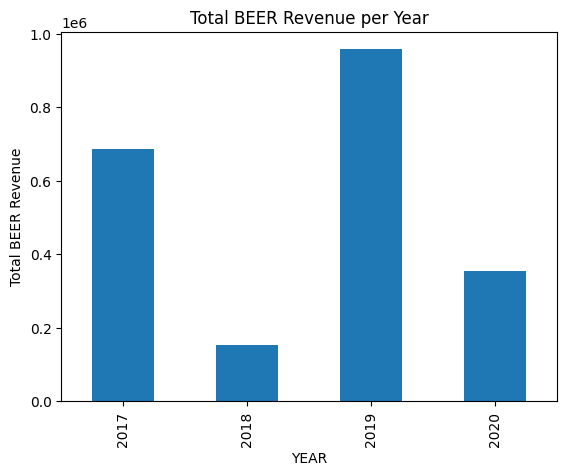

In [10]:
# let's plot the distro of BEER revenues over the years
beer_revenue_per_year = data.groupby('YEAR')['RETAIL SALES'].sum()
beer_revenue_per_year.plot(kind='bar')
plt.xlabel('YEAR')
plt.ylabel('Total BEER Revenue')
plt.title('Total BEER Revenue per Year')
plt.show()



In [12]:
# check if in each year we have all the months
data.groupby('YEAR')['MONTH'].nunique()

YEAR
2017     7
2018     2
2019    11
2020     4
Name: MONTH, dtype: int64

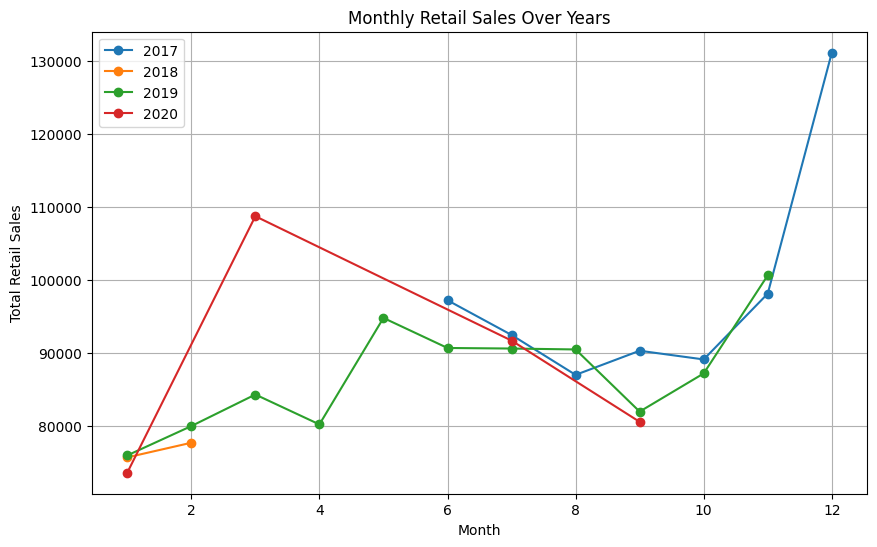

In [11]:
# plot the revenue sales over months for each year
plt.figure(figsize=(10,6))
for year in data['YEAR'].unique():
    monthly_data = data[data['YEAR'] == year].groupby('MONTH')['RETAIL SALES'].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=year)
plt.xlabel('Month')
plt.ylabel('Total Retail Sales')
plt.title('Monthly Retail Sales Over Years')
plt.legend()
plt.grid()
plt.show()

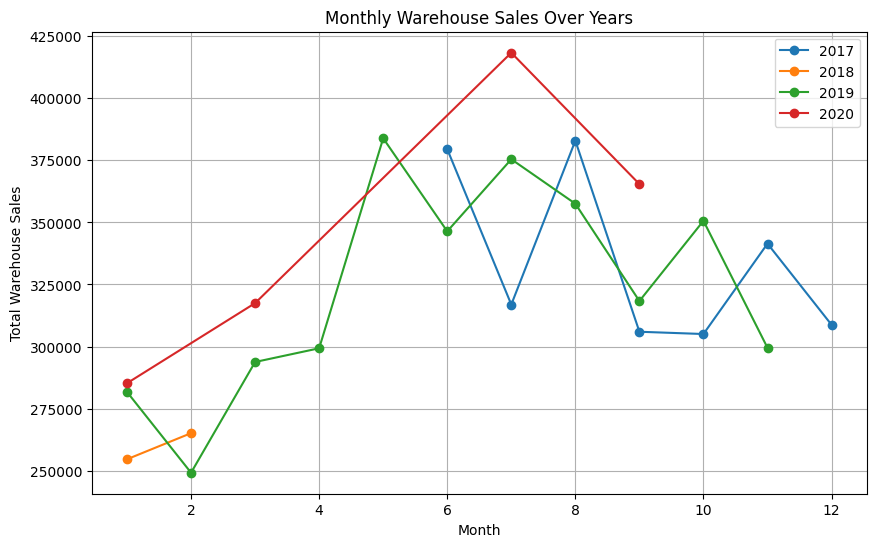

In [14]:
# plot the revenue sales over months for each year
plt.figure(figsize=(10,6))
for year in data['YEAR'].unique():
    monthly_data = data[data['YEAR'] == year].groupby('MONTH')['WAREHOUSE SALES'].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=year)
plt.xlabel('Month')
plt.ylabel('Total Warehouse Sales')
plt.title('Monthly Warehouse Sales Over Years')
plt.legend()
plt.grid()
plt.show()

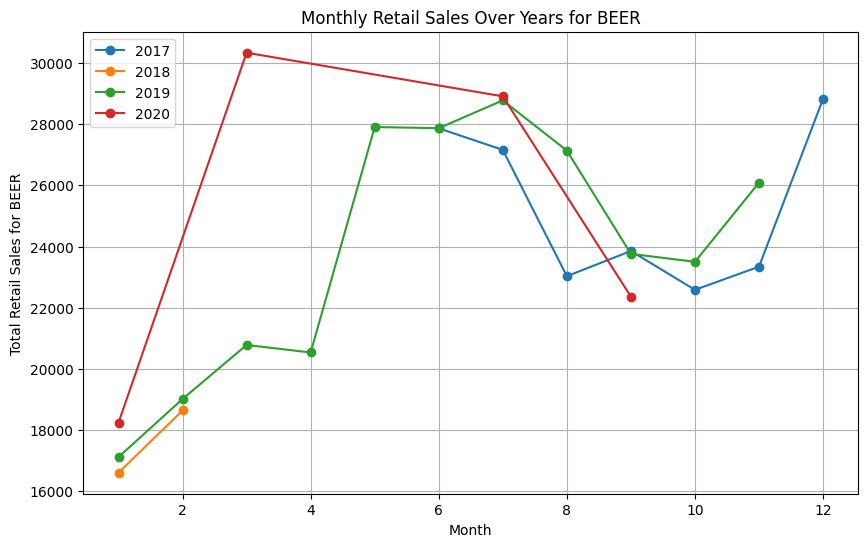

In [15]:
# plot the revenue sales over months for each year for the beer
plt.figure(figsize=(10,6))
for year in data['YEAR'].unique():
    monthly_data = data[(data['YEAR'] == year) & (data['ITEM TYPE'] == 'BEER')].groupby('MONTH')['RETAIL SALES'].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=year)
plt.xlabel('Month')
plt.ylabel('Total Retail Sales for BEER')
plt.title('Monthly Retail Sales Over Years for BEER')
plt.legend()
plt.grid()
plt.show()



In [16]:
# build a feature for total sales (retail + warehouse)
data['TOTAL SALES'] = data['RETAIL SALES'] + data['WAREHOUSE SALES']



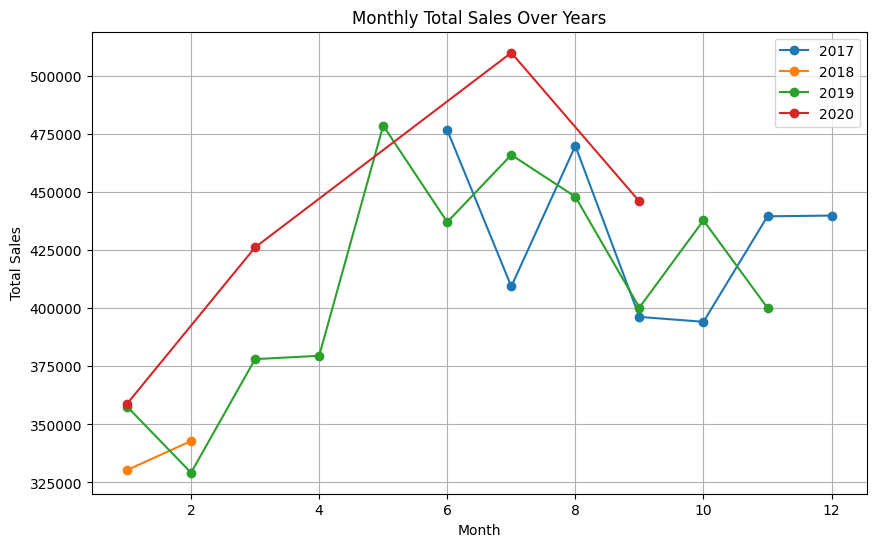

In [17]:
# plot the revenue sales over months for each year
plt.figure(figsize=(10,6))
for year in data['YEAR'].unique():
    monthly_data = data[data['YEAR'] == year].groupby('MONTH')['TOTAL SALES'].sum()
    plt.plot(monthly_data.index, monthly_data.values, marker='o', label=year)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales Over Years')
plt.legend()
plt.grid()
plt.show()

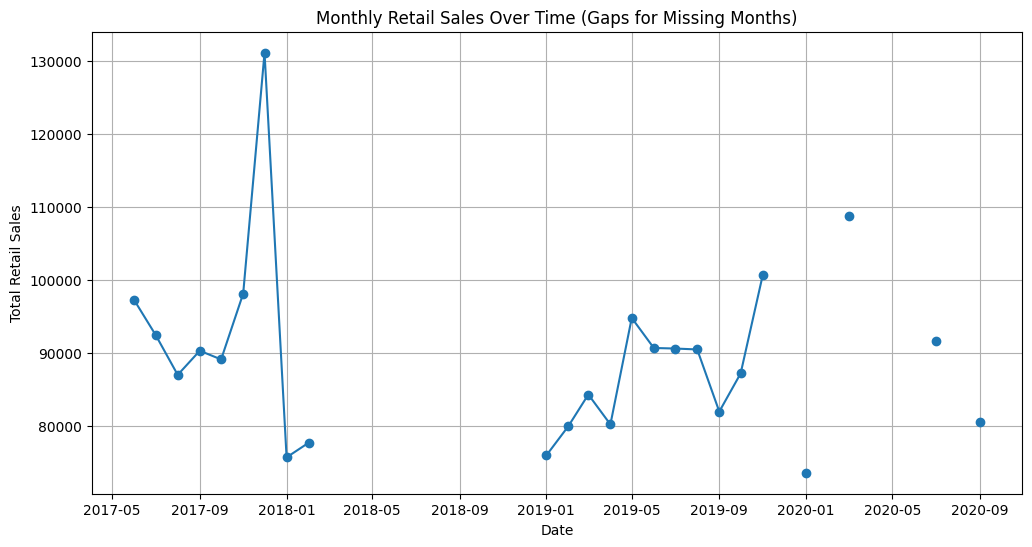

In [18]:
plt.figure(figsize=(12,6))

# Creiamo la colonna DATE e raggruppiamo i dati
data['DATE'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))
monthly_revenue = data.groupby('DATE')['RETAIL SALES'].sum()

# --- MODIFICA PER LA DISCONTINUITÀ ---

# 1. Definiamo l'intervallo completo di tutti i mesi tra la prima e l'ultima data
start_date = monthly_revenue.index.min()
end_date = monthly_revenue.index.max()
# 'MS' sta per Month Start (Inizio Mese)
full_date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# 2. Reindicizziamo la serie. I mesi mancanti vengono riempiti con NaN
monthly_revenue_full = monthly_revenue.reindex(full_date_range)

# 3. Tracciamo la serie reindicizzata. Matplotlib lascerà un gap dove c'è NaN.
plt.plot(monthly_revenue_full.index, monthly_revenue_full.values, marker='o')

# -------------------------------------

plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.title('Monthly Retail Sales Over Time (Gaps for Missing Months)')
plt.grid()
plt.show()


In [19]:
data.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL SALES,DATE
count,307211.000000,307211.000000,307211.000000,307211.000000,307211.000000,307211.000000,307211
mean,2018.438204,6.424073,7.000271,6.935561,25.397532,32.397804,2018-11-21 07:46:54.309383680
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000,-4996.000000,2017-06-01 00:00:00
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2017-11-01 00:00:00
50%,2019.000000,7.000000,0.320000,0.000000,1.000000,2.680000,2019-03-01 00:00:00
75%,2019.000000,9.000000,3.250000,3.000000,5.000000,10.500000,2019-09-01 00:00:00
max,2020.000000,12.000000,1816.490000,1990.830000,18317.000000,19491.000000,2020-09-01 00:00:00
std,1.083076,3.461847,30.389254,30.244498,249.607447,266.147998,NaN


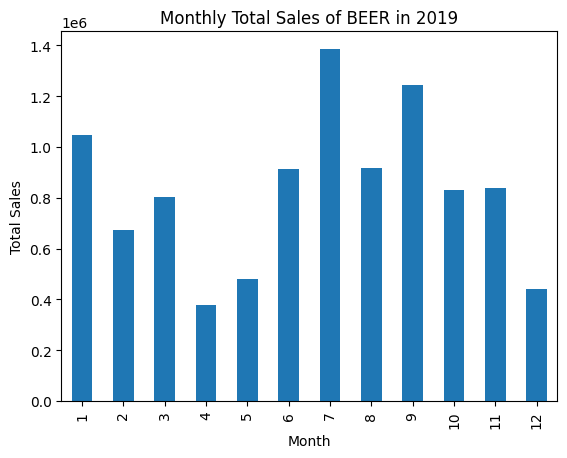

In [21]:
# plot on an histogram the monthly total sales of beer 2019
beer_2019_monthly = data.groupby('MONTH')['TOTAL SALES'].sum()
beer_2019_monthly.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales of BEER in 2019')
plt.show()


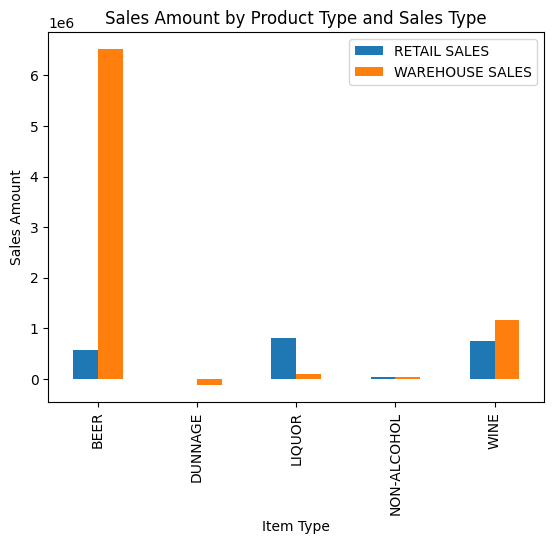

In [32]:
# plot an histogram of the sales amount by product type and sales type (retail and warehouse) excluding KEGS AND STR_SUPPLIES
filtered_data = data[~data['ITEM TYPE'].isin(['KEGS', 'STR_SUPPLIES'])]
sales_by_type = filtered_data.groupby(['ITEM TYPE'])[['RETAIL SALES', 'WAREHOUSE SALES']].sum()
sales_by_type.plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Product Type and Sales Type')
plt.show()




In [38]:
# compute the total value of total sales of beer, wine and liquor
total_sales_by_type = data.groupby('ITEM TYPE')['TOTAL SALES'].sum()
total_sales_by_type


ITEM TYPE
BEER            7101457.04
DUNNAGE         -121307.00
KEGS             118431.00
LIQUOR           897597.70
NON-ALCOHOL       53299.90
STR_SUPPLIES          0.00
WINE            1903482.99
Name: TOTAL SALES, dtype: float64